##FOLLOW THESE STEPS TO RUN THIS WORKBOOK
Run all cells by choosing the commands as shown in the picture that can be found at the top of this workbook in the menu bar:
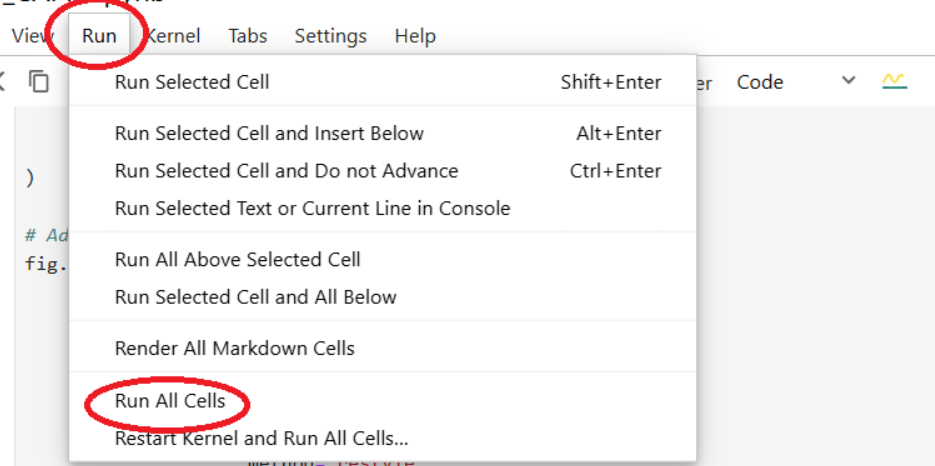




##The following model called Prophet was developed by Meta.

Prophet is an excellent model for business forecasts.  It is a machine learning additive regression model. Prophet has backtesting already built into the model; whereby, the model will take part of the historical data to and determine how well it predicted the next period in order to train the model.  Backtesting as well as training a model is normally a cumbersome process without using this built in feature that Meta has created.
The code for Prophet can be found by a general search on Github.com.

The data is Johnson & Johnson company sales revenue in millions generated from Google Gemini on 9/24/2025.
The graphs that follow are the sales figures that are partially historical and partially forecast through 2026.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


23:58:31 - cmdstanpy - INFO - Chain [1] start processing
23:58:31 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper
368 2026-06-26  24148.681713  23565.227264  24737.099807
369 2026-06-27  24151.621553  23547.814738  24718.410627
370 2026-06-28  24154.561394  23556.711233  24775.263844
371 2026-06-29  24157.501234  23524.105680  24698.364599
372 2026-06-30  24160.441075  23553.578575  24734.966869


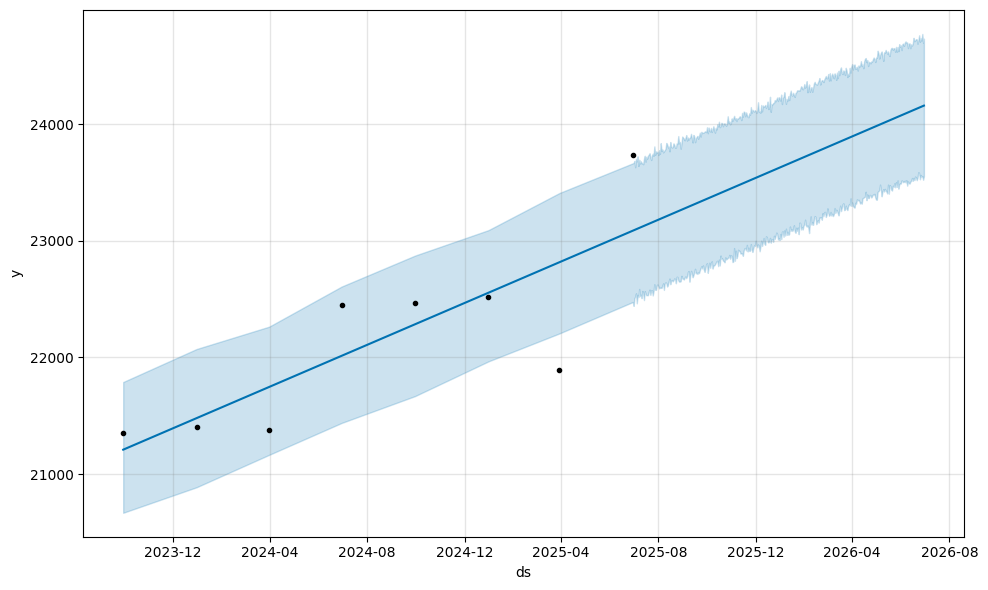

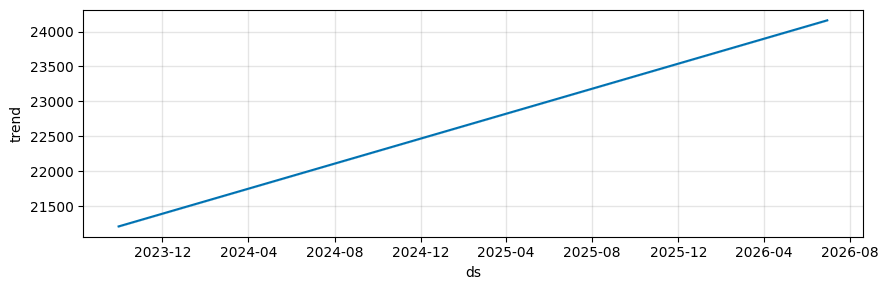

In [1]:
import pandas as pd
from prophet import Prophet
!pip install openpyxl
import requests

#Import data for Johnson & Johnson sales

# Set the URL for the Johnson & Johnson sales data file
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Johnson&Johnson.xlsx'

# Send a GET request to the URL to download the file
response = requests.get(url)

# Open a local file named 'Johnson&Johnson.xlsx' in binary write mode
# and save the content of the response to it
with open('Johnson&Johnson.xlsx', 'wb') as file:
    file.write(response.content)

# Assign the file path to a variable for easier use
file_path = 'Johnson&Johnson.xlsx'

# Read the Excel file into a pandas DataFrame.
# The sheet name is 'Johnson&Johnson'
df = pd.read_excel(file_path, sheet_name='create a spreadsheet of real da')

# Rename the columns to 'ds' and 'y' for use with a time series forecasting model like Prophet.
# The original date column is 'Date' and the sales column is 'Sales'.
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Rename the columns to 'ds' and 'y' for use with a time series forecasting model like Prophet.
# The original date column is 'Date' and the sales column is 'Sales'.
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

# Convert the 'ds' column to datetime objects
df['ds'] = pd.to_datetime(df['ds'])

# Ensure 'y' is numeric
df['y'] = pd.to_numeric(df['y'])

# 1. Instantiate the model
m = Prophet()

# 2. Fit the model to your data
m.fit(df)

# 3. Create a future DataFrame to make predictions
future = m.make_future_dataframe(periods=365)


# 4. Make the forecast
forecast = m.predict(future)

# You can now view the forecasted values, which include yhat (the prediction),
# and confidence intervals (yhat_lower, yhat_upper)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
fig1 = m.plot(forecast)

# Plot the forecast components (trend, weekly, yearly)
fig2 = m.plot_components(forecast)